<a href="https://colab.research.google.com/github/nirvika28/urbanheatt_map/blob/main/Urbanheatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("taruneshburman/urban-heat-island-uhi-effect-prediction")

print("Path to dataset files:", path1)

Using Colab cache for faster access to the 'urban-heat-island-uhi-effect-prediction' dataset.
Path to dataset files: /kaggle/input/urban-heat-island-uhi-effect-prediction


In [ ]:
import os

os.listdir(path1)


['Disease_Incidence_Rate.csv']

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(f"{path}/Disease_Incidence_Rate.csv")

# Display first few rows
print(df.head())
print(df.info())

         Date  Average Rainfall (mm)  Temperature Variability (C)  \
0  2010-01-31             157.482769                     5.811496   
1  2010-02-28             218.241656                     3.808232   
2  2010-03-31             118.845294                     7.123808   
3  2010-04-30             126.578375                     9.831849   
4  2010-05-31             247.246290                     6.827945   

   Flood Incidence (count)  Airborne Particulate Matter (µg/m³)  \
0                        2                            24.049382   
1                        0                            53.744938   
2                        1                            24.377933   
3                        1                           134.294150   
4                        5                            51.641569   

   Healthcare Access Index  Disease Incidence Rate (%)  
0                 0.680702                    5.108111  
1                 0.929897                   13.265511  
2          

In [ ]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


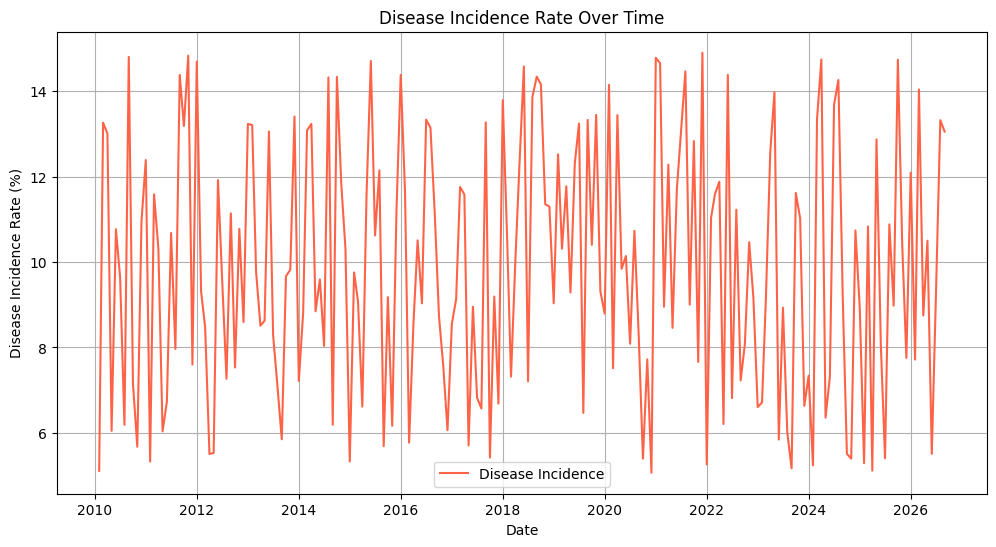

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Disease Incidence Rate (%)'], color='tomato', label='Disease Incidence')
plt.title("Disease Incidence Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Disease Incidence Rate (%)")
plt.grid(True)
plt.legend()
plt.show()


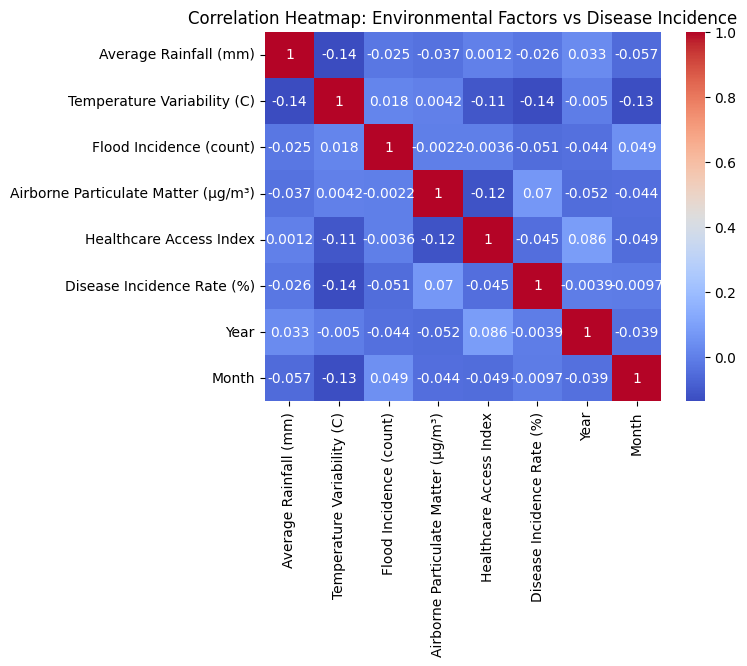

In [ ]:
import seaborn as sns

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Environmental Factors vs Disease Incidence")
plt.show()


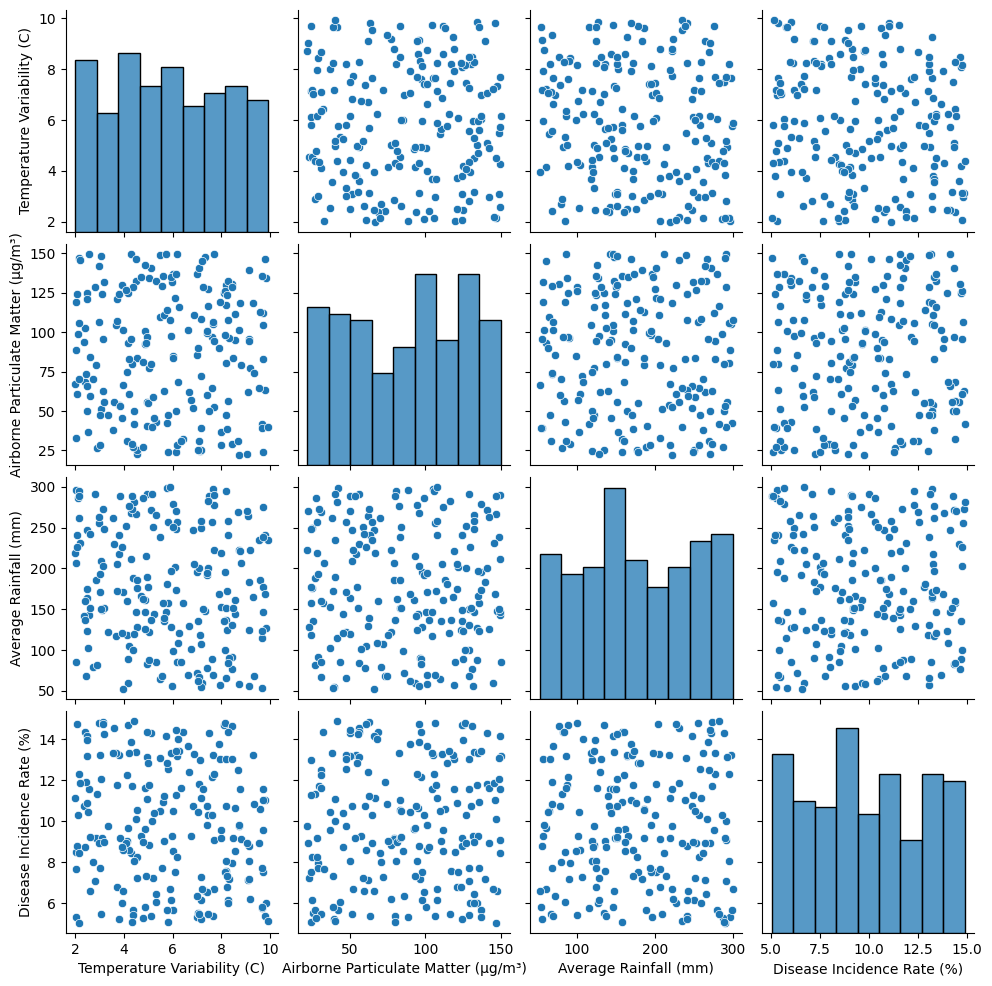

In [ ]:
sns.pairplot(df[['Temperature Variability (C)',
                 'Airborne Particulate Matter (µg/m³)',
                 'Average Rainfall (mm)',
                 'Disease Incidence Rate (%)']])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X = df[['Average Rainfall (mm)',
        'Temperature Variability (C)',
        'Flood Incidence (count)',
        'Airborne Particulate Matter (µg/m³)',
        'Healthcare Access Index']]

y = df['Disease Incidence Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: -0.042762952036172086
MAE: 2.760441194233784


In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(importance)


                               Feature  Coefficient
3  Airborne Particulate Matter (µg/m³)     0.003200
0                Average Rainfall (mm)    -0.000431
2              Flood Incidence (count)    -0.000656
1          Temperature Variability (C)    -0.229816
4              Healthcare Access Index    -2.047959


✅ Loaded city coordinates:
        City   Latitude  Longitude  Mean_LST_Celsius
0      Delhi  28.632803  77.219771         26.844004
1     Mumbai  19.054999  72.869203         34.153660
2  Bangalore  12.976794  77.590082         32.874217
3    Chennai  13.083694  80.270186         34.031386
4  Hyderabad  17.360589  78.474061         34.020376

📊 Model Performance:
R² Score: -0.1019
MAE: 1.3709

✅ Saved predictions to 'Urban_HeatMap_100.csv'


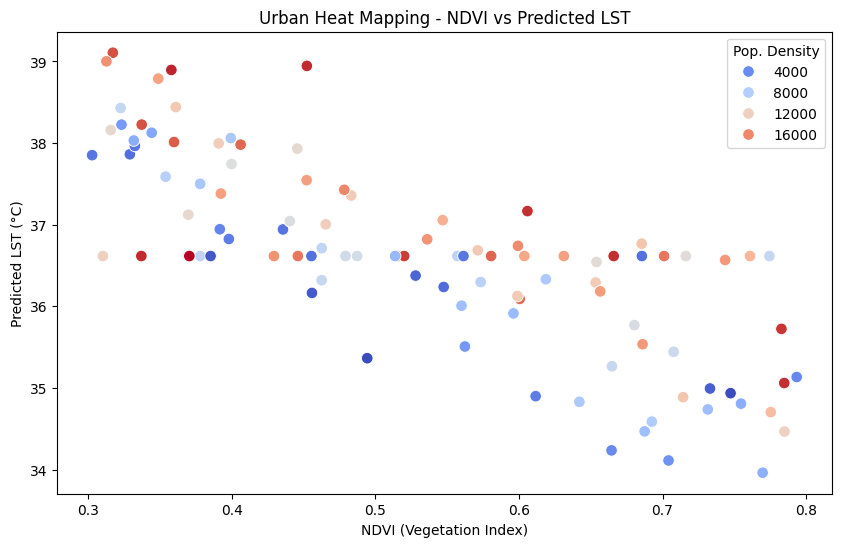

In [ ]:
# Install required libraries
!pip install pandas scikit-learn geopy matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import random

# ------------------------------
# STEP 1: Load your 100-city CSV
# ------------------------------
df = pd.read_csv("India_100Cities_LST_2024.csv")
print("✅ Loaded city coordinates:")
print(df.head())

# ------------------------------
# STEP 2: Add Synthetic Features
# ------------------------------
# Simulate NDVI and Population Density
np.random.seed(42)
df["NDVI"] = np.random.uniform(0.3, 0.8, len(df))  # vegetation index
df["PopulationDensity"] = np.random.randint(1000, 20000, len(df))


df["Mean_LST_Celsius"] = (
    40 - (df["NDVI"] * 8) + (df["PopulationDensity"] / 10000) + np.random.normal(0, 0.5, len(df))
)


X = df[["Latitude", "Longitude", "NDVI", "PopulationDensity"]]
y = df["Mean_LST_Celsius"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# STEP 4: Train SVM Regressor
# ------------------------------
model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

df["Predicted_LST_Celsius"] = model.predict(X)
df.to_csv("Urban_HeatMap_100.csv", index=False)
print("\n✅ Saved predictions to 'Urban_HeatMap_100.csv'")

# ------------------------------
# STEP 7: Visualization
# ------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="NDVI", y="Predicted_LST_Celsius", hue="PopulationDensity", palette="coolwarm", s=70)
plt.title("Urban Heat Mapping - NDVI vs Predicted LST")
plt.xlabel("NDVI (Vegetation Index)")
plt.ylabel("Predicted LST (°C)")
plt.legend(title="Pop. Density")
plt.show()


📊 R² Score: 0.8237
📉 MAE: 1.0023
✅ Saved results as 'Urban_HeatMap_Results.csv'


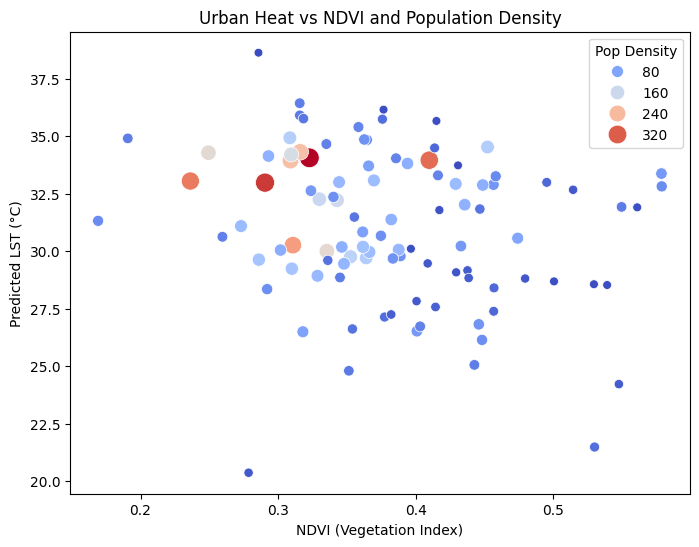

/tmp/ipython-input-2830889694.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values("Predicted_LST", ascending=False),


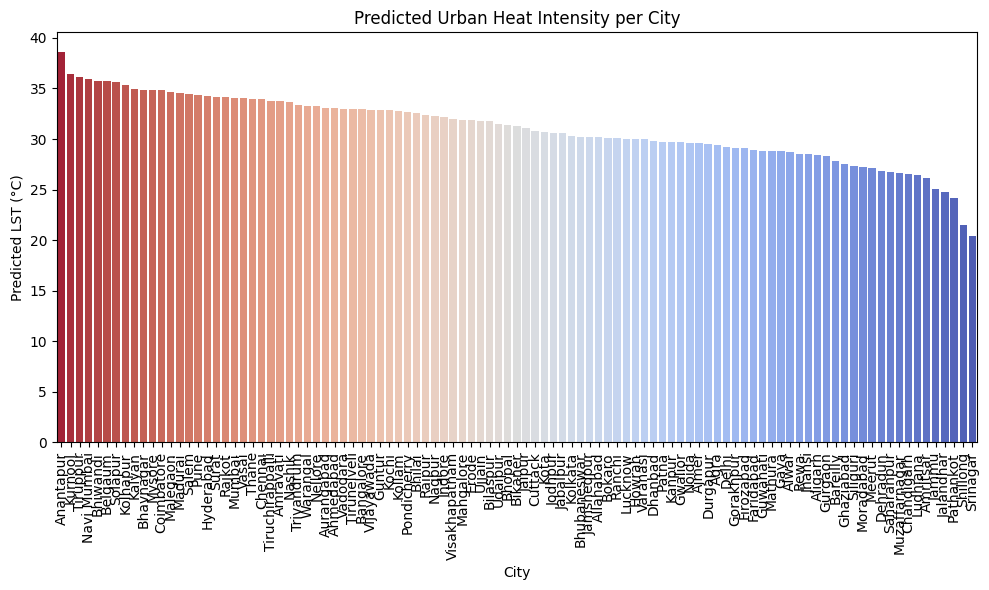

In [11]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

# Load enhanced dataset
df = pd.read_csv("India_100Cities_Enhanced.csv")

# Drop missing NDVI or population values
df = df.dropna(subset=["NDVI", "PopulationDensity", "Mean_LST_Celsius"])

# -------------------------
# Define Features and Target
# -------------------------
X = df[["Latitude", "Longitude", "NDVI", "PopulationDensity"]]
y = df["Mean_LST_Celsius"]

# Scale features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# -------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"📊 R² Score: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")

# -------------------------
# Save Predictions
# -------------------------
df["Predicted_LST"] = svm_model.predict(scaler.transform(X))
df.to_csv("Urban_HeatMap_Results.csv", index=False)
print("✅ Saved results as 'Urban_HeatMap_Results.csv'")


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="NDVI",
    y="Predicted_LST",
    hue="PopulationDensity",
    size="PopulationDensity",
    palette="coolwarm",
    sizes=(40,200)
)
plt.title("Urban Heat vs NDVI and Population Density")
plt.xlabel("NDVI (Vegetation Index)")
plt.ylabel("Predicted LST (°C)")
plt.legend(title="Pop Density")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values("Predicted_LST", ascending=False),
            x="City", y="Predicted_LST", palette="coolwarm_r")
plt.xticks(rotation=90)
plt.title("Predicted Urban Heat Intensity per City")
plt.ylabel("Predicted LST (°C)")
plt.tight_layout()
plt.show()


In [10]:
# =============================
# Urban Heat Map Visualization
# =============================

import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your SVM results
df = pd.read_csv("Urban_HeatMap_Results.csv")

# Check columns
print(df.head())

# Drop missing coordinates
df = df.dropna(subset=["Latitude", "Longitude", "Predicted_LST"])

# Create base map centered over India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5, tiles='CartoDB dark_matter')

# Create heat data (latitude, longitude, intensity)
heat_data = [[row['Latitude'], row['Longitude'], row['Predicted_LST']] for index, row in df.iterrows()]

# Add HeatMap layer
HeatMap(
    heat_data,
    min_opacity=0.4,
    radius=20,
    blur=15,
    max_zoom=6,
).add_to(m)

# Add city markers with names and details
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        color='white',
        fill=True,
        fill_color='red' if row["Predicted_LST"] > df["Predicted_LST"].mean() else 'blue',
        fill_opacity=0.7,
        popup=f"<b>{row['City']}</b><br>LST: {row['Predicted_LST']:.2f}°C<br>NDVI: {row['NDVI']:.3f}<br>PopDensity: {row['PopulationDensity']}",
    ).add_to(m)

# Save the map
m.save("UrbanHeat_India_Map.html")
m


        City   Latitude  Longitude  Mean_LST_Celsius      NDVI  \
0      Delhi  28.632803  77.219771         26.844004  0.310053   
1     Mumbai  19.054999  72.869203         34.153660  0.322766   
2  Bangalore  12.976794  77.590082         32.874217  0.290502   
3    Chennai  13.083694  80.270186         34.031386  0.309010   
4  Hyderabad  17.360589  78.474061         34.020376  0.249411   

   PopulationDensity  Predicted_LST  
0         118.374759      29.235159  
1         363.478275      34.053845  
2         341.383558      32.974763  
3         234.517116      33.931615  
4         191.498948      34.275099  


| Color         | Meaning                        | Temperature Range (approx.) |
| ------------- | ------------------------------ | --------------------------- |
| 🔵 **Blue**   | Cooler regions                 | < 28°C                      |
| 🟢 **Green**  | Moderate temperature           | 28–32°C                     |
| 🟡 **Yellow** | Warm regions                   | 32–34°C                     |
| 🔴 **Red**    | Hot urban zones (heat islands) | > 34°C                      |



Red clusters you see are urban heat island zones — areas with higher surface temperature (often linked to dense infrastructure, low vegetation, and high population).